In [5]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline

#-----
# set styles

mpl.rcParams['font.family'] = ['sans-serif']
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17
mpl.rcParams['lines.linewidth'] = 2

mpl.rcParams['pdf.fonttype'] = 42 # allegedly allows text to be saved as editable

mpl.rcParams['font.sans-serif'] = ['Arial Narrow']
mpl.rcParams['font.size'] = 9
mpl.rcParams['text.usetex'] = False
mpl.rcParams['svg.fonttype'] = 'none'

import warnings
warnings.filterwarnings("ignore")

plt.style.use(['ggplot'])
# prints list of available seaborn styles
#print(plt.style.available)

from scipy.stats import norm

print('ready')

tips = sns.load_dataset("tips")


ready


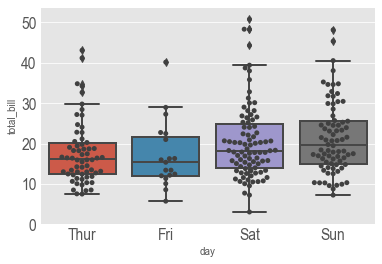

In [7]:
g = sns.boxplot(x="day", y="total_bill", data=tips)
g = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

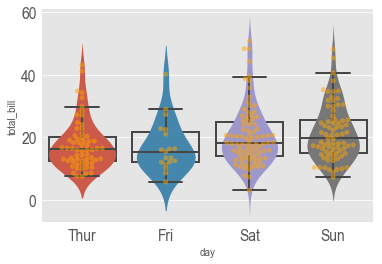

In [44]:
g = sns.boxplot(x="day", y="total_bill", data=tips, 
                showcaps=True, boxprops={'facecolor':'None'}, showfliers=False)
g = sns.swarmplot(x="day", y="total_bill", data=tips, color="orange")
plt.setp(g.collections, alpha=.5)
g = sns.violinplot(x="day", y="total_bill", data=tips, inner=None, linewidth=0)



In [69]:
import pandas as pd
import numpy as np


In [142]:
pitching = pd.read_csv('csv/soxpitch.csv', index_col=None)
pitching['setcol'] = '#000000'
pitching['Team'] = 'WHITE SOX'
pitching.shape

(14, 62)

In [143]:
cubs = pd.read_csv('csv/cubspitch.csv', index_col=None)
cubs['setcol'] = '#000FFF'
cubs['Team'] = 'CUBS'
cubs.head(3)

,posName,posnum,lastname,position,status_code,bats,throws,Name,Team,W,...,SLperc,CUperc,KCperc,EPperc,CHperc,SCperc,KNperc,UNperc,avgIP,setcol
0,Eddie Butler,33,Butler,P,D10,R,R,Eddie Butler,CUBS,0,...,NaN,8.0,NaN,NaN,3.8,NaN,NaN,NaN,2.4,#000FFF
1,Tyler Chatwood,21,Chatwood,P,A,R,R,Tyler Chatwood,CUBS,1,...,NaN,10.5,NaN,NaN,4.2,NaN,NaN,NaN,5.3,#000FFF
2,Steve Cishek,41,Cishek,P,A,R,R,Steve Cishek,CUBS,1,...,30.1,NaN,NaN,NaN,1.5,NaN,NaN,NaN,1.1,#000FFF


In [144]:
pitching = pitching.append(cubs)
pitching.shape

(28, 62)

In [145]:
pitching.dtypes

posName         object
posnum           int64
lastname        object
position        object
status_code     object
bats            object
throws          object
Name            object
Team            object
W                int64
L                int64
ERA            float64
WAR            float64
G                int64
GS               int64
CG               int64
ShO              int64
SV               int64
BS               int64
IP             float64
H                int64
R                int64
ER               int64
HR               int64
BB               int64
HBP              int64
WP               int64
BK               int64
SO               int64
IFFB           float64
                ...   
Pitches          int64
RS             float64
AVG            float64
WHIP           float64
BABIP          float64
FIP            float64
WPA            float64
RAR            float64
K9             float64
BB9            float64
Kperc          float64
BBperc         float64
LOBperc    

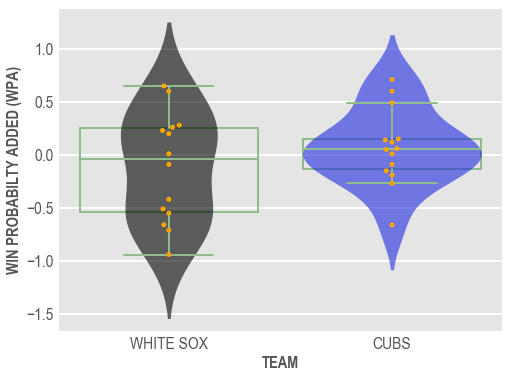

In [148]:
# #6B8E23
my_pal = {"WHITE SOX": "#000000", "CUBS": "#000FFF"}
g = sns.boxplot(x="Team", y="WPA", data=pitching,  
                showcaps=True, 
                boxprops={'facecolor':'None', 'edgecolor': '#8FBC8B' }, 
                whiskerprops={'color': '#8FBC8B'}, 
                capprops={'color': '#8FBC8B'}, 
                medianprops={'color': '#8FBC8B'}, 
                showfliers=False)
g = sns.violinplot(x="Team", y="WPA", data=pitching, inner=None, linewidth=0, palette=my_pal)
plt.setp(g.collections, alpha=.6)
g = sns.swarmplot(x="Team", y="WPA", data=pitching, color="orange")
g.grid(axis='y', linewidth=2)
g.figure.set_size_inches(8,6)
# Add labels to the plot
g.set_ylabel('WIN PROBABILTY ADDED (WPA)', fontsize=16, fontweight='bold')
g.set_xlabel('TEAM', fontsize=16, fontweight='bold')
g.figure.savefig('static/img/WPA.png',bbox_inches='tight')


In [ ]:
# The olive lines are the box and whiskers blot, otherwise known as a box plot. 
# Excluding outliers, this chart divides up all the values into quintiles, with the box showing the middle two quinitles.
# So the box should roughly show where 50% of the values lie, with the line inside the box is the median value. 
# Outliers are anything that fall beyond the "whiskers," or the lines shooting out above and below the box.

# On top of that is the violin plot. It's the color area whose where the width represents the number of values
# that fall along that vertical axes. The more values there, the wider the plot is at that point. 
# I'm also using the colors of the plot to quickly identify each team (black = White Sox, blue = Cubs)

# The swarm plot is the orange dots. Basically, all those dots should be on the line, where overlapping dots would be 
# hard to see. A swarm plot simply moves them right or left of the center line so you can see each dot.